# **MEAN VARIANCE PORTFOLIO**

<p>
This project implements Harry Markowitz’s Mean–Variance portfolio optimisation, the foundational model of Modern Portfolio Theory (MPT). The objective is to construct portfolios that optimally balance expected return and risk (measured as variance or standard deviation of returns).

Using historical market data, we:

1. Compute expected returns and covariance matrix
    Return series and asset co-movement structure are estimated from real financial data.

2. Generate optimal portfolios
    We evaluate:
    * 2.1 Minimum-variance portfolio
    * 2.2 Maximum Sharpe ratio portfolio
    * 2.3 Efficient frontier consisting of optimal risk–return combinations
    <br>
    </br>

3. Visualise the Efficient Frontier
    Plots show how risk (volatility) increases with expected return and where optimal portfolios lie relative to random allocations or equal-weight portfolios.

4. Interpret portfolio weights
    We analyse:
    * 4.1 Why do high-volatility assets receive lower weights
    * 4.2 How diversification affects risk
    *  4.3 Impact of correlation structure on portfolio optimisation

   </p>
## Mathematical Formulation

The Markowitz Mean–Variance optimisation solves:

$$
\min_{w} \; w^\top \Sigma w
$$

subject to:

$$
\sum_{i=1}^{n} w_i = 1
$$

$$
w^\top \mu = \mu_p
$$

(Optional)

$$
w_i \ge 0 \quad \forall i
$$


#### Where

- **$w$** — Vector of portfolio weights  
  (how much we invest in each asset)

- **$\Sigma$** — Covariance matrix of asset returns  
  (captures volatilities and correlations)

- **$w^\top \Sigma w$** — Portfolio variance  
  (total risk of the portfolio)

- **$\mu$** — Vector of expected returns  
  (average return of each asset)

- **$\mu_p$** — Target portfolio return  
  (return level required by the investor)

- **$\sum_{i=1}^{n} w_i = 1$** — Full-investment constraint  
  (weights must sum to 1)

- **$w_i \ge 0$** — Long-only constraint  
  (no short selling; optional)


In [1]:
import Risk_Kit as rk
import numpy as np
import pandas as pd

In [2]:
# Reading CSV file containing the data of industry returns
k='ind30_m_vw_rets.csv'
ind = rk.get_hfi_returns(k)
ind.head()

C:\Users\write\Documents\IITG_MTECH\Placements\Portfolio_DEC\data\Risk_Kit.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hfi=pd.read_csv(c,header=0,index_col=0,parse_dates=True)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


The above dataset contains the monthly returns of 30 industries over the time period from 1926 to 2018. Each Column represents raw percentage numbers 

<Axes: title={'center': 'Annualised Returns of All sets over the Period 1996 to 2000'}>

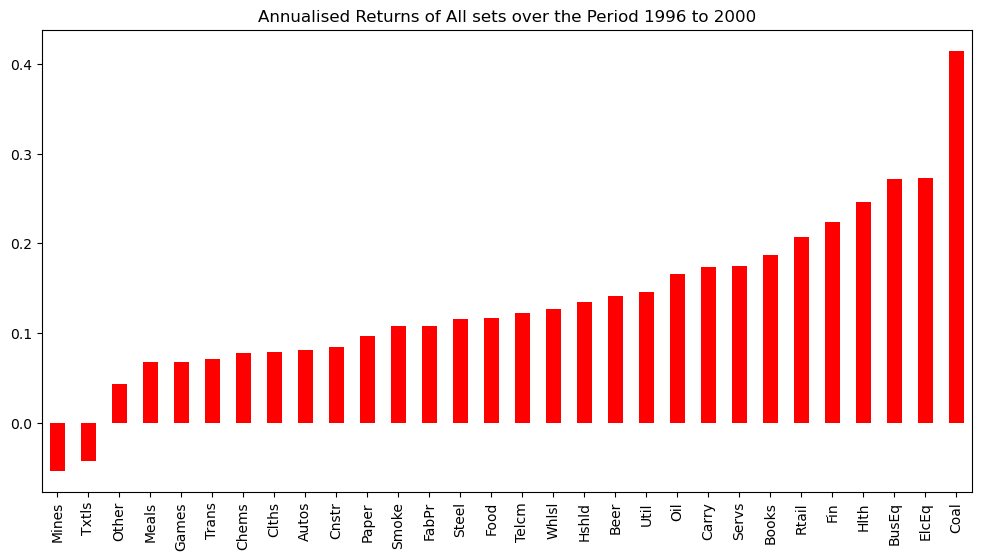

In [3]:
#Computing the expected returns of each Industry over the 1996 to 2000 time period

ind_er = rk.annualised_returns(ind['1996':'2000'],12)
ind_er.sort_values().plot.bar(figsize=(12,6),title='Annualised Returns of All sets over the Period 1996 to 2000',color='red')

We can observe that the Expected Annualised return over the entire period from 1996 to 2000. Note that the mining industry asset exhibited a negative return of 5.35% and the Textile industry asset exhibited a negative return of 4.27%. While all other assets exhibited positive returns over the 1996 to 2000 period and coal was the asset with the maximum return. 

Minimum Wealth Index=  wealth_index    1932-06
dtype: period[M] 
Maximun Wealth Index=  wealth_index    2018-01
dtype: period[M]


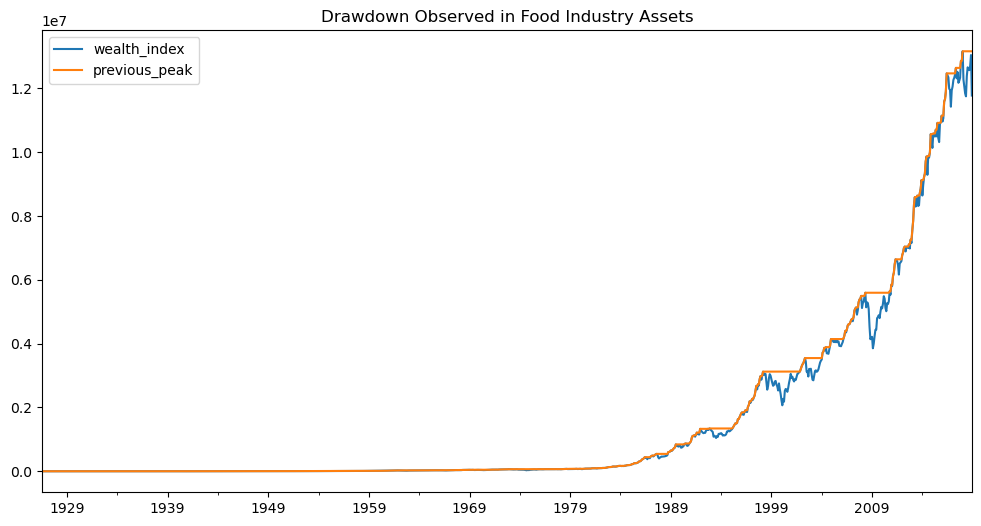

In [4]:
rk.drawdown(ind['Food'])[['wealth_index','previous_peak']].plot(figsize=(12,6),title='Drawdown Observed in Food Industry Assets')
min_value=rk.drawdown(ind['Food'])[['wealth_index']].idxmin()
max_value=rk.drawdown(ind['Food'])[['wealth_index']].idxmax()
print('Minimum Wealth Index= ',min_value,'\nMaximun Wealth Index= ',max_value)

From the plot we observe that our wealth saw a significant dip in June 1932, and a significant gain in January 2018

Period('1932-06', 'M')

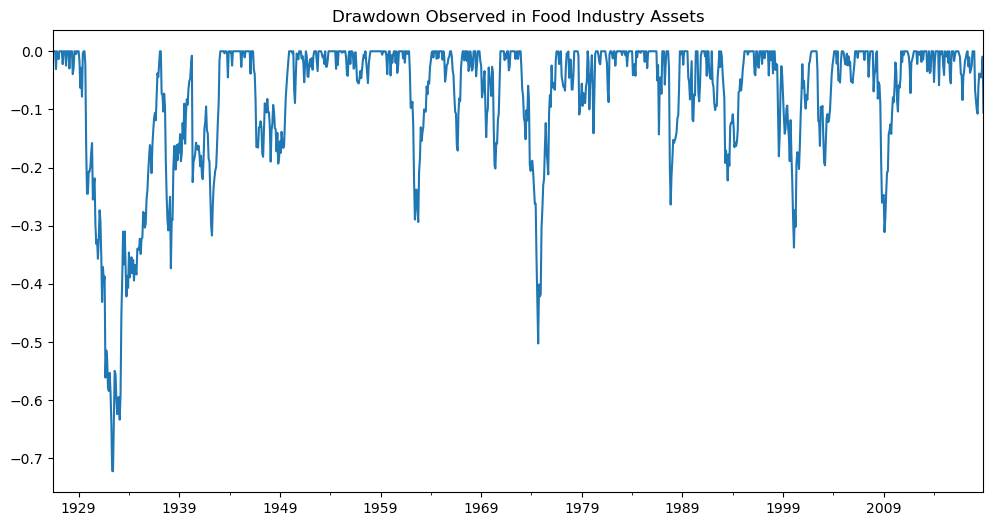

In [5]:
rk.drawdown(ind['Food'])['drawdown'].plot(figsize=(12,6),title='Drawdown Observed in Food Industry Assets')
rk.drawdown(ind['Food'])['drawdown'].idxmin()

We can observe that the maximum drawdown occurred in June 1932, and the result from the above cell is verified 

In [6]:
# Computing the Covariance Matrix

ind_cov=ind['1996':'2000'].cov()
ind_cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


The above is a Covariance matrix. 
Observation: The Covariance matrix is symmetric matrix with principal diagnol representing variance while the off diagnol element represent the covariance between the respective two industries"

## *Two Asset Frontier*

In [7]:
l=['Fin','Beer']

<Axes: xlabel='Volatility'>

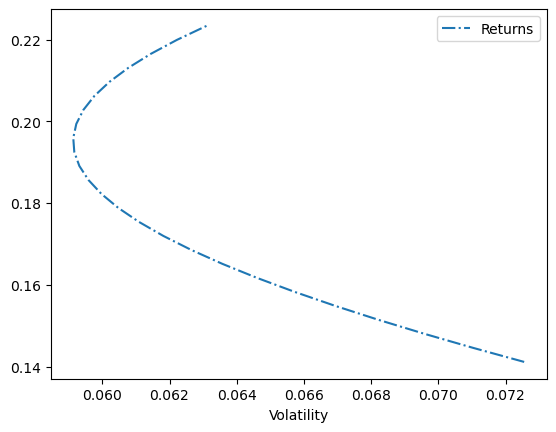

In [8]:
rk.plot_ef2(25,ind_er[l],ind_cov.loc[l,l])

Here we are creating a Portfolio, allocating weights to the two assets, namely Finance and Beer industry assets and Plotting Efficient frontier with 25 different weight combinations

## *MARKOWITZ OPTIMISED PORTFOLIO*

In [9]:
k=['Coal','Mines']

In [10]:
w15=rk.minimize_vol(0.15,ind_er[k],ind_cov.loc[k,k])*100
vol15=rk.portfolio_vol(w15,ind_cov.loc[k,k])
print('To Obtain Minimum Volatility among the Coal and Mines asset at 15% return must be invested with percentages: ',w15[0].round(3), '% in Coal and ',w15[1].round(3), '% in Mine Asset')

To Obtain Minimum Volatility among the Coal and Mines asset at 15% return must be invested with percentages:  43.472 % in Coal and  56.528 % in Mine Asset


In [11]:
print('The Corresponding Volatility is: ',vol15,'%')

The Corresponding Volatility is:  8.324939567261877 %


<Axes: xlabel='Volatility'>

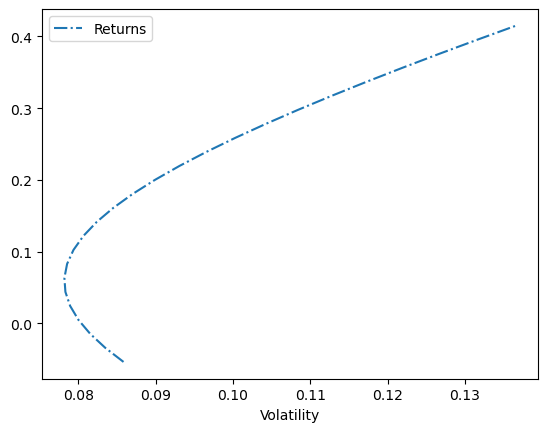

In [12]:
rk.plot_ef2(25,ind_er[k],ind_cov.loc[k,k])

The plot above defines an efficient frontier and for correspondin 15% return we calculate the weights in which the assets must be invested in

## *Max Sharpe Ratio Portfolio*

In [13]:
%load_ext autoreload
%autoreload 2

<Axes: xlabel='Volatility'>

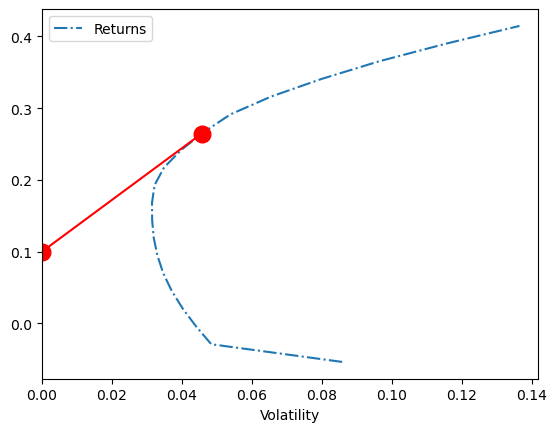

In [14]:
rk.plot_ef(20,ind_er,ind_cov,True,0.1)

The red line depicts the Capital Market Line, and the marker depicts the Optimal Max Sharpe Ratio Portfolio at 10% risk free rate for Industry returns from 1996 to 2000

# *Drawbacks of Max Sharpe Ratio*

A maximum Sharpe ratio portfolio is theoretically attractive but has several important practical drawbacks, especially when moving from toy to real data.​

1. Input sensitivity and estimation error
    - The max-Sharpe (tangency) portfolio is extremely sensitive to estimated expected returns: tiny changes in the mean vector can produce huge changes in weights, so sampling noise or model error often leads to unstable portfolios.
    - Because expected returns are much noisier than covariances, the Sharpe-maximising solution tends to be heavily “overfit” to the in-sample period and can perform poorly out of sample compared with more robust rules like minimum-variance or even 1/N
<br></br>
2. Concentration and leverage issues
    - In practice, the max-Sharpe solution often concentrates on a small subset of assets with the highest estimated risk-adjusted returns, ignoring diversification and making the portfolio fragile to errors in those few names
    - If leverage or shorting is allowed, the optimiser may generate highly leveraged positions (large long and short weights) to boost the Sharpe on historical data, which can be unrealistic, expensive, or dangerous under changing market conditions
<br></br>
3. Metric-level limitations
    - The Sharpe ratio itself treats upside and downside volatility the same and assumes a roughly symmetric, normal return distribution, which is not true for many strategies with skew or fat tails, so max-Sharpe portfolios can hide tail risk
    - Because Sharpe is computed from historical data and depends on choices like the risk-free rate and the sampling window, it can be manipulated or inflated by selecting favourable periods or smoothing returns, so “maximising Sharpe” can chase artefacts rather than robust performance.

<Axes: xlabel='Volatility'>

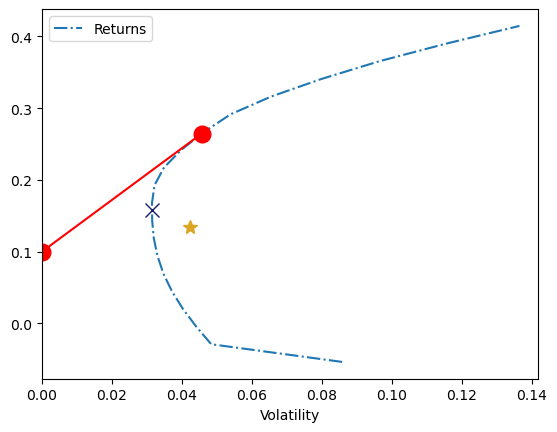

In [15]:
rk.plot_ef(20,ind_er,ind_cov,show_cml=True,risk_free_rate=0.1,show_ew=True,show_gmv=True)

X is the Global Minimum Variance Portfolio on the efficient frontier 